<a href="https://colab.research.google.com/github/Samdatascienti/Samdatascienti/blob/main/Copy_of_tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# visit to the national parks with products

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# accessing drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_pro=pd.read_excel('/content/gdrive/MyDrive/Tourism_project/Consolidated database ( national parks) with prices.xlsx')
df_pro.head()

,Park,Year,Month,Product,Visitors,price,Primates,Trails,Camping,Canopy,Birding,Game Safari,Camping.1,Boat ride,Behind Scene,Fishing & Other,Gorillas,Mountain climbing,Dian Fossey's Tomb,Golden Monkey,Nature Walk,caves,t,January,February,March,April,May,June,July,August,September,October,November,December,covid-19,Unnamed: 36
0,Nyungwe,2009,January,Primates,175,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,Nyungwe,2009,February,Primates,170,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN
2,Nyungwe,2009,March,Primates,91,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN
3,Nyungwe,2009,April,Primates,69,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN
4,Nyungwe,2009,May,Primates,158,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN


In [ ]:
df_pro.columns

Index(['Park ', 'Year', 'Month ', 'Product', 'Visitors', 'price', 'Primates',
       'Trails', 'Camping', 'Canopy', 'Birding', 'Game Safari', 'Camping.1',
       'Boat ride', 'Behind Scene', 'Fishing & Other ', 'Gorillas',
       'Mountain climbing', 'Dian Fossey's Tomb', 'Golden Monkey',
       'Nature Walk', 'caves', 't', 'January', 'February', 'March', 'April',
       'May', 'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'covid-19', 'Unnamed: 36'],
      dtype='object')

In [ ]:
df=df_pro[['Park ', 'Year', 'Month ', 'Product', 'Visitors', 'price','covid-19']]
df.head()

,Park,Year,Month,Product,Visitors,price,covid-19
0,Nyungwe,2009,January,Primates,175,60,0
1,Nyungwe,2009,February,Primates,170,60,0
2,Nyungwe,2009,March,Primates,91,60,0
3,Nyungwe,2009,April,Primates,69,60,0
4,Nyungwe,2009,May,Primates,158,60,0


In [ ]:
df.isnull().sum()

Park        0
Year        0
Month       0
Product     0
Visitors    0
price       0
covid-19    0
dtype: int64

In [ ]:
data = df.rename(columns = {'Month ': 'Month', 'Park ': 'Park'}, inplace = False)

In [ ]:
data=data.replace(to_replace={'Month': {"Septepmber":"September","April ":"April", "March ":"March"}}, value=None)

In [ ]:
data=data.replace(to_replace={'Product': {"nature Walk":"Nature Walk","caves":"Caves"}}, value=None)

In [ ]:
data.head()

,Park,Year,Month,Product,Visitors,price,covid-19
0,Nyungwe,2009,January,Primates,175,60,0
1,Nyungwe,2009,February,Primates,170,60,0
2,Nyungwe,2009,March,Primates,91,60,0
3,Nyungwe,2009,April,Primates,69,60,0
4,Nyungwe,2009,May,Primates,158,60,0


In [ ]:
# # groupby
# # grouping total_amount by year, month, week, drugs, and districts
# df_grouped= data.groupby(['Year','Month','Park','Product']).agg(date=('Year','first'),
#                                                               number=('Number of visitors ',np.sum)
#                                                               ).reset_index().sort_values('date')

In [ ]:
# df_grouped

In [ ]:
tours_data=data
tours_data['Year'] = tours_data['Year'].astype(str)
tours_data['date'] = tours_data['Month'] + '-' + tours_data['Year']
tours_data.head()

,Park,Year,Month,Product,Visitors,price,covid-19,date
0,Nyungwe,2009,January,Primates,175,60,0,January-2009
1,Nyungwe,2009,February,Primates,170,60,0,February-2009
2,Nyungwe,2009,March,Primates,91,60,0,March-2009
3,Nyungwe,2009,April,Primates,69,60,0,April-2009
4,Nyungwe,2009,May,Primates,158,60,0,May-2009


In [ ]:
# replacing written error in september 2021
# tours_data.replace(to_replace = "Septepmber-2021", value ="September-2021", inplace=True)

In [ ]:
# transforming date from string to date format
tours_data['date']=pd.to_datetime(tours_data['date'])
# transforming date from float to integer
tours_data['Visitors'] = tours_data['Visitors'].astype(int)
tours_data['covid-19'] = tours_data['covid-19'].astype(bool)
tours_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Park      2436 non-null   object        
 1   Year      2436 non-null   object        
 2   Month     2436 non-null   object        
 3   Product   2436 non-null   object        
 4   Visitors  2436 non-null   int64         
 5   price     2436 non-null   int64         
 6   covid-19  2436 non-null   bool          
 7   date      2436 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 135.7+ KB


In [ ]:
# Time Range 
tours_data["date"].min(), tours_data["date"].max(), tours_data["Visitors"].min(), tours_data["Visitors"].max()

(Timestamp('2009-01-01 00:00:00'), Timestamp('2021-09-01 00:00:00'), 0, 6474)

In [ ]:
tours_data.head()

,Park,Year,Month,Product,Visitors,price,covid-19,date
0,Nyungwe,2009,January,Primates,175,60,False,2009-01-01
1,Nyungwe,2009,February,Primates,170,60,False,2009-02-01
2,Nyungwe,2009,March,Primates,91,60,False,2009-03-01
3,Nyungwe,2009,April,Primates,69,60,False,2009-04-01
4,Nyungwe,2009,May,Primates,158,60,False,2009-05-01


In [ ]:
# Dataframe must be sorted by date because of Time Series Split 
df1 = tours_data.sort_values("date")

# to split test and train 
train = df1.loc[(df1["date"] < "2018-09-01"), :]
test = df1.loc[(df1["date"] >= "2018-09-01"), :]
train.shape, test.shape

((1844, 8), (592, 8))

In [ ]:
# (561/1896)*100
(test.shape[0]/train.shape[0])*100

32.10412147505423

In [ ]:
train.describe()

,Visitors,price,trend
count,1844.000000,1844.000000,1844.000000
mean,353.585683,147.060738,921.500000
std,712.757111,351.198838,532.461266
min,0.000000,20.000000,0.000000
25%,16.000000,45.000000,460.750000
50%,100.000000,50.000000,921.500000
75%,254.000000,75.000000,1382.250000
max,6474.000000,1500.000000,1843.000000


In [ ]:
test.describe()

,Visitors,price,trend
count,592.000000,592.000000,592.000000
mean,347.047297,158.673986,295.500000
std,783.204207,347.821074,171.039956
min,0.000000,20.000000,0.000000
25%,14.750000,45.000000,147.750000
50%,86.500000,72.500000,295.500000
75%,314.250000,95.000000,443.250000
max,6462.000000,1500.000000,591.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 595
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Park      1844 non-null   category      
 1   Year      1844 non-null   object        
 2   Month     1844 non-null   category      
 3   Product   1844 non-null   category      
 4   Visitors  1844 non-null   int64         
 5   price     1844 non-null   int64         
 6   covid-19  1844 non-null   category      
 7   date      1844 non-null   datetime64[ns]
 8   trend     1844 non-null   int64         
dtypes: category(4), datetime64[ns](1), int64(3), object(1)
memory usage: 95.0+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1333 to 2435
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Park      592 non-null    category      
 1   Year      592 non-null    object        
 2   Month     592 non-null    category      
 3   Product   592 non-null    category      
 4   Visitors  592 non-null    int64         
 5   price     592 non-null    int64         
 6   covid-19  592 non-null    category      
 7   date      592 non-null    datetime64[ns]
 8   trend     592 non-null    int64         
dtypes: category(4), datetime64[ns](1), int64(3), object(1)
memory usage: 31.4+ KB


In [ ]:
train['Product'].value_counts()

Camping               244
Trails                116
Primates              116
Nature Walk           116
Mountain climbing     116
Gorillas              116
Golden Monkey         116
Game Safari           116
Fishing & Other       116
Dian Fossey's Tomb    116
Caves                 116
Canopy                116
Birding               116
Behind Scene          116
Boat ride              92
Name: Product, dtype: int64

In [ ]:
test['Product'].value_counts()

Camping               74
Trails                37
Primates              37
Nature Walk           37
Mountain climbing     37
Gorillas              37
Golden Monkey         37
Game Safari           37
Fishing & Other       37
Dian Fossey's Tomb    37
Caves                 37
Canopy                37
Boat ride             37
Birding               37
Behind Scene          37
Name: Product, dtype: int64

In [ ]:
train['Month'].value_counts()

April        159
November     159
June         159
August       159
July         159
December     159
September    159
May          159
January      159
October      159
February     159
March        159
Name: Month, dtype: int64

In [ ]:
test['Month'].value_counts()

June         48
August       48
July         48
May          48
February     48
March        48
September    48
January      48
April        48
October      32
December     32
November     32
Name: Month, dtype: int64

Descriptive statistics

In [ ]:
#different aggregate by Park
table = pd.pivot_table(tours_data,index=['Park'],aggfunc={'Visitors':np.sum}).sort_values('Visitors', ascending = False)
table

,Visitors
Park,
Akagera,405124
Volcanoes,328737
Nyungwe,123603


In [ ]:
#different aggregate by Month
table = pd.pivot_table(tours_data,index=['Month'],aggfunc={'Visitors':np.sum}).sort_values('Visitors', ascending = False)
table

,Visitors
Month,
July,107141
August,104220
June,83020
December,75204
September,75125
January,72395
February,68166
October,67025
March,58257


In [ ]:
#different aggregate by Park
table = pd.pivot_table(tours_data,index=['Product'],aggfunc={'Visitors':np.sum}).sort_values('Visitors', ascending = False)
table

,Visitors
Product,
Game Safari,359098
Gorillas,223063
Golden Monkey,51022
Canopy,49786
Primates,34492
Trails,32917
Mountain climbing,32579
Camping,25930
Boat ride,21446


Visualizations

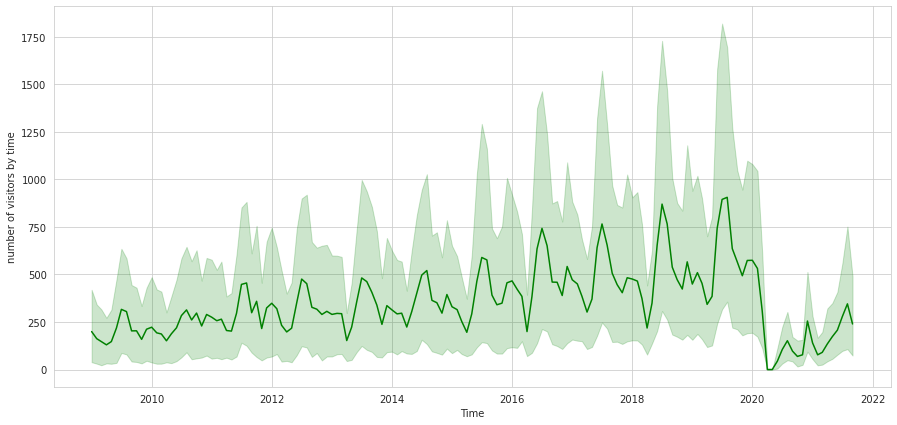

In [ ]:
#Let's have a look at number of visitors by date
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'date', y = 'Visitors', data = tours_data, color='green')
plt.xlabel('Time')
plt.ylabel('number of visitors by time')
display()

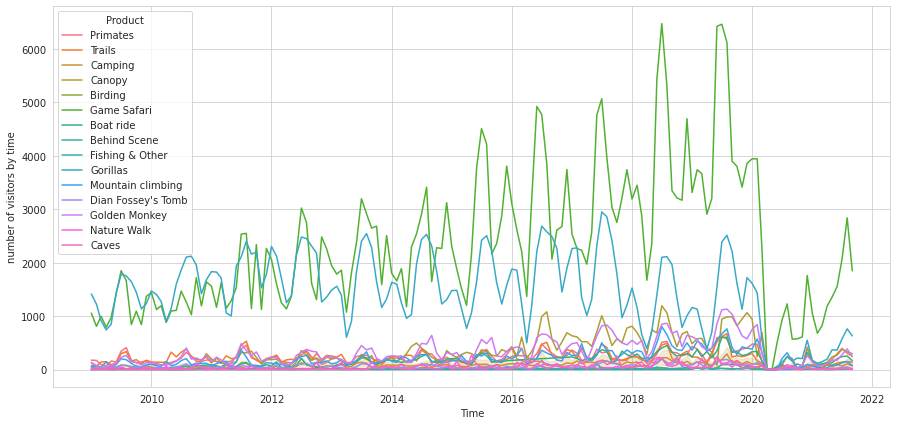

In [ ]:
#Let's have a look at number of visitors by product
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'date', y = 'Visitors', hue='Product',data = tours_data, color='green')
plt.xlabel('Time')
plt.ylabel('number of visitors by time')
display()

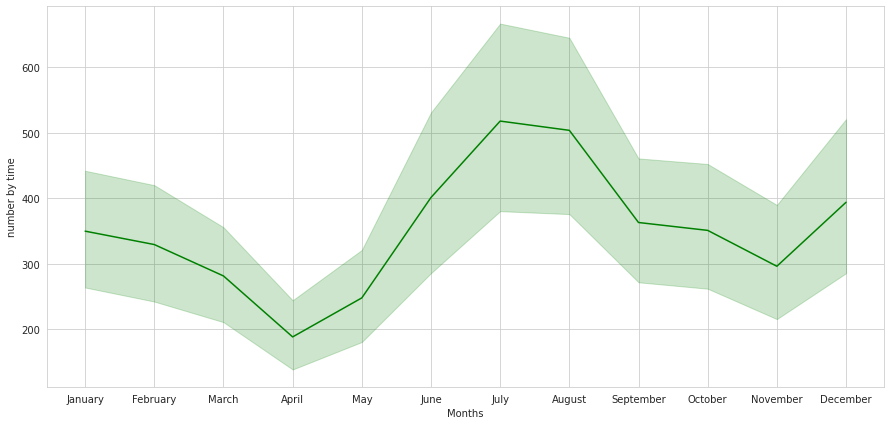

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.lineplot(x = 'Month', y = 'Visitors', data = tours_data, color='green')
plt.xlabel('Months')
plt.ylabel('number by time')
display()


In [ ]:
tours_data.head()

,Park,Year,Month,Product,Visitors,price,covid-19,date
0,Nyungwe,2009,January,Primates,175,60,False,2009-01-01
1,Nyungwe,2009,February,Primates,170,60,False,2009-02-01
2,Nyungwe,2009,March,Primates,91,60,False,2009-03-01
3,Nyungwe,2009,April,Primates,69,60,False,2009-04-01
4,Nyungwe,2009,May,Primates,158,60,False,2009-05-01


# Model for product *data*

# Train

In [ ]:
#Add a trend component to our timeseres with drugs added
train['trend']= range(train.shape[0])
# change month column to category for onehot encoding process
train['covid-19']=train['covid-19'].astype('category')
train['Month']=train['Month'].astype('category')
train['Park']=train['Park'].astype('category')
train['Product']=train['Product'].astype('category')
# dropping columns not required in model
X= train.drop(['date','Visitors','Year'],axis=1)
# dummies and their columns names
names= pd.get_dummies(X).columns
X=pd.get_dummies(X).values
# dependent variable
y= train.Visitors.values
# y=np.log(y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

# Test

In [ ]:
#Add a trend component to our timeseres with drugs added
test['trend']= range(test.shape[0])
# change month column to category for onehot encoding process
test['covid-19']=test['covid-19'].astype('category')
test['Month']=test['Month'].astype('category')
test['Park']=test['Park'].astype('category')
test['Product']=test['Product'].astype('category')

# dropping columns not required in model
X_test= test.drop(['date','Visitors','Year'],axis=1)
# dummies and their columns names
names_test= pd.get_dummies(X_test).columns
X_test=pd.get_dummies(X_test).values
# dependent variable
y_test= test.Visitors.values

# y_test=np.log(y_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
X.shape

(1988, 34)

In [ ]:
X_test.shape

(448, 34)

In [ ]:

names

Index(['price', 'trend', 'Park_Akagera', 'Park_Nyungwe', 'Park_Volcanoes',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Product_Behind Scene', 'Product_Birding', 'Product_Boat ride',
       'Product_Camping', 'Product_Canopy', 'Product_Caves',
       'Product_Dian Fossey's Tomb', 'Product_Fishing & Other ',
       'Product_Game Safari', 'Product_Golden Monkey', 'Product_Gorillas',
       'Product_Mountain climbing', 'Product_Nature Walk', 'Product_Primates',
       'Product_Trails', 'covid-19_False', 'covid-19_True'],
      dtype='object')

In [ ]:
names_test

Index(['price', 'trend', 'Park_Akagera', 'Park_Nyungwe', 'Park_Volcanoes',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Product_Behind Scene', 'Product_Birding', 'Product_Boat ride',
       'Product_Camping', 'Product_Canopy', 'Product_Caves',
       'Product_Dian Fossey's Tomb', 'Product_Fishing & Other ',
       'Product_Game Safari', 'Product_Golden Monkey', 'Product_Gorillas',
       'Product_Mountain climbing', 'Product_Nature Walk', 'Product_Primates',
       'Product_Trails', 'covid-19_False', 'covid-19_True'],
      dtype='object')

Libraries

In [ ]:
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files

# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

Linear regression

In [ ]:
# linear regression
model = LinearRegression()
model.fit(X,y)
model.get_params()
model.coef_
# Prediction by model  train
prediction= model.predict(X)

from sklearn.metrics import mean_squared_error
mse_train_d=np.sqrt(mean_squared_error(y,prediction))
print('Mean square error train: ',mse_train_d)
r_score_train=r2_score(y,prediction)
print('r score of train {}'.format(r_score_train))

# test Prediction by model
pred_test= model.predict(X_test)
mse_test=np.sqrt(mean_squared_error(y_test,pred_test))
r_score_test=r2_score(y_test,pred_test)
print('Mean square error test: ', mse_test)
print('r score of test {}'.format(r_score_test))
diff=mse_train_d-mse_test
print('Mean square error difference between train and test: ', diff)


Mean square error train:  299.75197985843243
r score of train 0.8230393992178621
Mean square error test:  534.2589948637917
r score of test 0.5338905716685984
Mean square error difference between train and test:  -234.50701500535928


In [ ]:
model.coef_

array([ 4.94312268e+00,  1.39294649e-01, -1.52284410e+10, -1.52284409e+10,
       -2.16669748e+09,  4.58215411e+10,  4.58215414e+10,  4.58215413e+10,
        4.58215412e+10,  4.58215412e+10,  4.58215414e+10,  4.58215413e+10,
        4.58215412e+10,  4.58215412e+10,  4.58215412e+10,  4.58215412e+10,
        4.58215413e+10,  6.12012746e+10,  6.12012746e+10,  6.12012747e+10,
        6.12012747e+10,  6.12012748e+10,  4.81395312e+10,  4.81395311e+10,
        6.12012746e+10,  6.12012768e+10,  4.81395313e+10,  4.81395257e+10,
        4.81395312e+10,  4.81395312e+10,  6.12012747e+10,  6.12012749e+10,
       -5.53961700e+10, -5.53961701e+10])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=6000,max_depth=8, max_features=8, min_samples_leaf=4,random_state=0)
regr.fit(X, y)
y_pred1 = regr.predict(X)
y_pred2 = regr.predict(X_test)

MSE_train= np.sqrt(mean_squared_error(y,y_pred1))
MSE_test= np.sqrt(mean_squared_error(y_test,y_pred2))
print('mean square error of train {}'.format(MSE_train))
print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(y,y_pred1)
r_score_test=r2_score(y_test,y_pred2)
print('r score of train {}'.format(r_score_train))
print('r score of test{}'.format(r_score_test))

mean square error of train 220.27032974210775
mean square error of test 551.9542665394081
r score of train 0.9044425685970676
r score of test0.5025030852506724


In [ ]:
regr.feature_importances_

array([2.38539874e-01, 5.77685201e-02, 2.19933353e-02, 8.98305946e-03,
       9.72072407e-03, 8.28695939e-03, 8.13682086e-03, 8.63347302e-04,
       7.98540305e-04, 4.76516294e-04, 1.07316285e-02, 2.55187862e-03,
       1.28227612e-03, 2.73762192e-03, 9.10504351e-04, 4.21655928e-04,
       2.27544634e-03, 9.79311340e-03, 2.28490839e-03, 7.67799258e-03,
       8.61019201e-03, 2.80852444e-03, 2.18833654e-03, 2.64927650e-03,
       8.73214601e-03, 4.37526068e-01, 2.55177871e-03, 1.33013227e-01,
       8.66766363e-04, 2.28669774e-03, 1.09822009e-03, 1.21336188e-03,
       1.12377046e-04, 1.08304444e-04])

In [ ]:
# Feature Importance of logistic regression
from matplotlib import pyplot
importance = regr.feature_importances_
# odds=np.exp(importance)
# summarize feature importance
feature_importances=pd.DataFrame({'features':names,'feature_importance':importance})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
25,Product_Game Safari,0.437526
0,price,0.238540
27,Product_Gorillas,0.133013
1,trend,0.057769
2,Park_Akagera,0.021993
10,Month_July,0.010732
17,Product_Behind Scene,0.009793
4,Park_Volcanoes,0.009721
3,Park_Nyungwe,0.008983
24,Product_Fishing & Other,0.008732


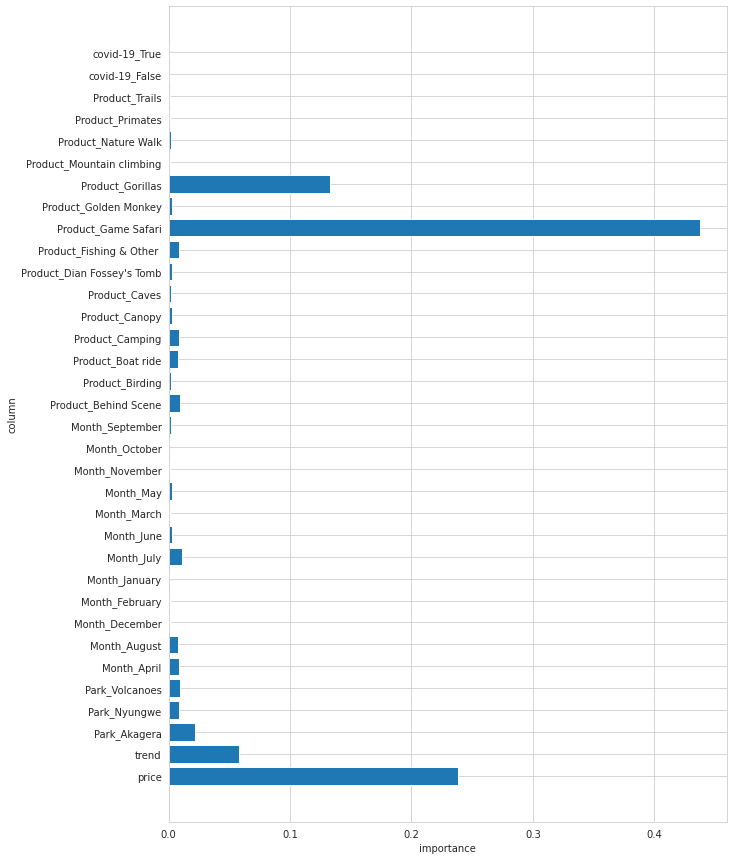

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,15))
plt.barh(feature_importances.features, feature_importances.feature_importance)
plt.xlabel('importance')
plt.ylabel('column')
display()